<a href="https://colab.research.google.com/github/anshu247/Machine-Learning/blob/master/cnn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# downloading the data from dropbox
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-06-16 02:43:14--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-06-16 02:43:14--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf084303aeac7ebd610121be5ef.dl.dropboxusercontent.com/zip_download_get/AdIaQ7j7wwI0ZKAPjCi8sDooIhLe_PCiEQwicops5hIO3DmYRYUhG1_N0NKwDuwT97PsVVhgb-GBUX8pDSUDLLxZ3nyVi4gVdw61AQEGRFhQ1Q [following]
--2020-06-16 02:43:15--  https://ucf084303aeac7ebd610121be5ef.dl.dropboxusercontent.com/zip_download_get/AdIaQ7j7wwI0ZKAPjCi8sDooIhLe_PCiEQwicops5hIO3DmYRYUhG1_N0NKwDuwT97PsVVhgb-GBUX8pDSUD

In [55]:
# unzip the file 
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
replace Images/cats/cat.3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  
 extracting: Images/dogs/dog.51.jpg  
 extracting: Images/

In [56]:
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   sample_data	 val_images
 Images				   test_images


In [0]:
import os
folder=os.listdir("Images")

In [58]:
for f in folder:
  path="Images/"+f
  print(f,": "+str(len(os.listdir(path))))

cats : 202
dogs : 202
humans : 202
horses : 202


So, there is no class imbalance problem

<class 'PIL.JpegImagePlugin.JpegImageFile'>


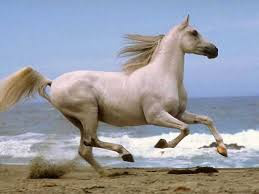

In [59]:
# to show an image
from keras.preprocessing import image
sample_path="Images/horses/horse-114.jpg"
img=image.load_img(sample_path)
print(type(img))
img

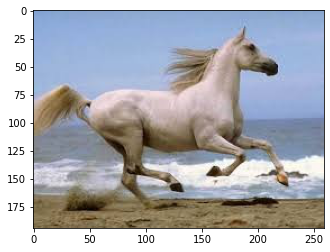

In [60]:
import matplotlib.pyplot as plt
x=image.img_to_array(img)/255.0
plt.imshow(x)

In [61]:
# model
from keras.layers import *
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))# no of output classes is 4
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers
adam=optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

In [0]:
#model.fit()# useful when dataset is small and it can fit inside the memory

In [64]:
import os,shutil
folders=os.listdir('Images')
if not os.path.isdir('val_images'):
  os.mkdir('val_images')
classes=['dogs','cats','horses','humans']
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   sample_data	 val_images
 Images				   test_images


In [66]:

for c in classes:
  p=os.path.join('val_images',c)
  print(p)
  #os.mkdir(p)
  if not p:
    os.mkdir(p)
    

val_images/dogs
val_images/cats
val_images/horses
val_images/humans


In [67]:
# we don't have validation set so we have to create one!

SPLIT=0.9
for f in os.listdir('Images'):
  path='Images/'+f
  imgs=os.listdir(path)
  split_size=int(SPLIT*len(imgs))
  files_to_move=imgs[split_size:]
  print(len(files_to_move))
  for img_f in files_to_move:
    src=os.path.join(path,img_f)
    dest=os.path.join('val_images/'+f,img_f)
    shutil.move(src,dest)
    

21
21
21
21


In [69]:
if not os.path.isdir('test_images'):
  os.mkdir('test_images')
classes=['dogs','cats','horses','humans']
for c in classes:
  p=os.path.join('test_images',c)
  #os.mkdir(p)
  if not p:
    os.mkdir(p)

SPLIT=0.8
for f in os.listdir('Images'):
  path='Images/'+f
  imgs=os.listdir(path)
  split_size=int(SPLIT*len(imgs))
  files_to_move=imgs[split_size:]
  print(len(files_to_move))
  for img_f in files_to_move:
    src=os.path.join(path,img_f)
    dest=os.path.join('test_images/'+f,img_f)
    shutil.move(src,dest)

37
37
37
37


In [70]:
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1.0/255)# rescale the image by dividing pixle by 255
train_generator=train_gen.flow_from_directory(
    "Images/",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
val_gen=ImageDataGenerator(rescale=1.0/255)# rescale the image by dividing pixle by 255
val_generator=val_gen.flow_from_directory(
    "val_images/",
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


Found 576 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [71]:
X,y=train_generator.next()[0].shape,train_generator.next()[1].shape
X,y

((32, 150, 150, 3), (32, 4))

- y- there are 32 tuples in 1 batch means 32 labels and classes are one hot encodoed so 4 columns
- X- there are 32 images of size 150*150 which is RGB 

In [72]:
 history=model.fit_generator(
     train_generator,
     epochs=100,
     steps_per_epoch= 7,
     validation_data=val_generator,
     validation_steps=4,
      

     
 )

Epoch 1/100
7/7 [==============================] - 12s 2s/step - loss: 1.3875 - acc: 0.2277 - val_loss: 1.3818 - val_acc: 0.2586
Epoch 2/100
7/7 [==============================] - 11s 2s/step - loss: 1.3804 - acc: 0.2679 - val_loss: 1.3799 - val_acc: 0.2500
Epoch 3/100
7/7 [==============================] - 12s 2s/step - loss: 1.3897 - acc: 0.2634 - val_loss: 1.3713 - val_acc: 0.3750
Epoch 4/100
7/7 [==============================] - 11s 2s/step - loss: 1.3693 - acc: 0.3839 - val_loss: 1.3687 - val_acc: 0.3707
Epoch 5/100
7/7 [==============================] - 11s 2s/step - loss: 1.3626 - acc: 0.3839 - val_loss: 1.3539 - val_acc: 0.3793
Epoch 6/100
7/7 [==============================] - 12s 2s/step - loss: 1.3473 - acc: 0.2902 - val_loss: 1.3178 - val_acc: 0.2788
Epoch 7/100
7/7 [==============================] - 11s 2s/step - loss: 1.3393 - acc: 0.4241 - val_loss: 1.2987 - val_acc: 0.4914
Epoch 8/100
7/7 [==============================] - 12s 2s/step - loss: 1.3100 - acc: 0.4375 - val

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

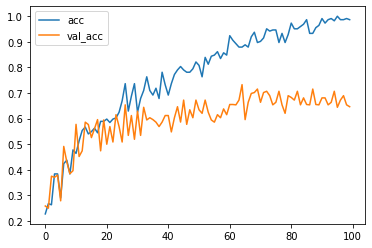

In [74]:
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()

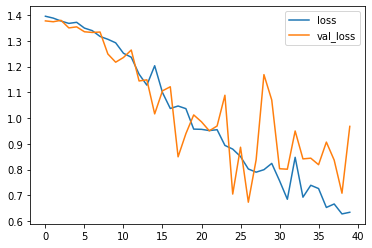

In [0]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()

In [75]:
test_gen=ImageDataGenerator(rescale=1.0/255)# rescale the image by dividing pixle by 255
test_generator=test_gen.flow_from_directory(
    "test_images/",
    target_size=(150,150),
    
    class_mode='categorical'
)

Found 148 images belonging to 4 classes.


In [0]:
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator)

In [0]:
import numpy as np

predicted_classes=np.argmax(np.round(predict),axis=1)

In [0]:

test_generator.filenames?

In [79]:
test_generator.labels.shape

(148,)

In [80]:
predicted_classes.shape

(148,)

In [81]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(test_generator.labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.26      0.30      0.28        37
     Class 1       0.33      0.24      0.28        37
     Class 2       0.21      0.22      0.21        37
     Class 3       0.27      0.30      0.28        37

    accuracy                           0.26       148
   macro avg       0.27      0.26      0.26       148
weighted avg       0.27      0.26      0.26       148



In [82]:
predicted_classes.view()

array([1, 3, 2, 0, 3, 0, 0, 3, 2, 0, 3, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1,
       3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 1, 2, 3, 1, 2, 3, 1, 3, 0, 2, 1,
       1, 0, 2, 1, 3, 2, 3, 2, 0, 3, 2, 3, 0, 3, 1, 0, 1, 3, 3, 2, 3, 0,
       1, 1, 1, 0, 2, 2, 3, 2, 0, 0, 2, 1, 3, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 0, 1, 1, 2, 3, 3, 3, 0, 0, 3, 0, 2, 0, 0, 2, 3, 0, 2, 3, 3,
       2, 3, 1, 2, 2, 0, 2, 0, 0, 0, 3, 1, 0, 3, 3, 2, 3, 1, 0, 0, 3, 2,
       2, 0, 3, 1, 1, 2, 0, 3, 3, 3, 2, 2, 1, 2, 0, 3])

In [83]:
test_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)